### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
from oci.auth import signers
import oci
import io
import pandas as pd

# Get the resource principal signer
signer = signers.get_resource_principals_signer()

# Create ObjectStorageClient with empty config and the resource principal signer
object_storage_client = oci.object_storage.ObjectStorageClient(config={}, signer=signer)

# Specify your namespace, bucket, and object name (all strings)
namespace = "lr0x98mmd4wz"  # Replace with your actual namespace string
bucket_name = "Energy-Prediction-Dataset"  # Replace with your actual bucket name
object_name = "msoa_final_with_payment_and_labels (1).csv"  # Replace with your actual object name

# Get the object from Object Storage
response = object_storage_client.get_object(namespace, bucket_name, object_name)

# Read object data, for example into a pandas DataFrame (if CSV)
data = response.data.content
df = pd.read_csv(io.BytesIO(data),  low_memory=False)

print(df.head())

  local authority code local authority  msoa code  \
0            E06000001      Hartlepool  E02002483   
1            E06000001      Hartlepool  E02002483   
2            E06000001      Hartlepool  E02002483   
3            E06000001      Hartlepool  E02002483   
4            E06000001      Hartlepool  E02002484   

  middle layer super output area number\nof meters total_consumption  \
0                 Hartlepool 001             3,743        12,986,912   
1                 Hartlepool 001             3,743        12,986,912   
2                 Hartlepool 001             3,743        12,986,912   
3                 Hartlepool 001             3,743        12,986,912   
4                 Hartlepool 002             4,802        15,109,783   

   mean_consumption median_consumption  year       msoa name  ...  \
0            3470.0              3,100  2010  Hartlepool 001  ...   
1            3470.0              3,100  2010  Hartlepool 001  ...   
2            3470.0              3,100  2

In [2]:
df

,local authority code,local authority,msoa code,middle layer super output area,number\nof meters,total_consumption,mean_consumption,median_consumption,year,msoa name,...,lower confidence limit (£),confidence interval (£),quarter,credit (%),direct debit (%),prepayment_%,annual_bill_estimate,cost_burden,default_risk_label,label_source
0,E06000001,Hartlepool,E02002483,Hartlepool 001,"3,743","12,986,912",3470.0,"3,100",2010,Hartlepool 001,...,"33,800","14,000",Mar,31.0,53.0,16.0,1041.0,0.025896,0,proxy_high_burden_high_prepay
1,E06000001,Hartlepool,E02002483,Hartlepool 001,"3,743","12,986,912",3470.0,"3,100",2010,Hartlepool 001,...,"33,800","14,000",Jun,30.0,54.0,16.0,1041.0,0.025896,0,proxy_high_burden_high_prepay
2,E06000001,Hartlepool,E02002483,Hartlepool 001,"3,743","12,986,912",3470.0,"3,100",2010,Hartlepool 001,...,"33,800","14,000",Sep,29.0,55.0,16.0,1041.0,0.025896,0,proxy_high_burden_high_prepay
3,E06000001,Hartlepool,E02002483,Hartlepool 001,"3,743","12,986,912",3470.0,"3,100",2010,Hartlepool 001,...,"33,800","14,000",Dec,29.0,56.0,16.0,1041.0,0.025896,0,proxy_high_burden_high_prepay
4,E06000001,Hartlepool,E02002484,Hartlepool 002,"4,802","15,109,783",3147.0,"2,735",2010,Hartlepool 002,...,"24,500","10,200",Mar,31.0,53.0,16.0,944.1,0.032332,0,proxy_high_burden_high_prepay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287736,W06000024,Merthyr Tydfil / Merthyr Tudful,W02000287,Merthyr Tydfil 005,NaN,"10,040,300",2737.0,"2,363",2023,Merthyr Tydfil 005,...,"32,700","13,300",NaN,NaN,NaN,NaN,821.1,0.021162,0,proxy_high_burden_high_prepay
287737,W06000024,Merthyr Tydfil / Merthyr Tudful,W02000288,Merthyr Tydfil 006,NaN,"10,291,416",2634.0,"2,224",2023,Merthyr Tydfil 006,...,"28,300","11,500",NaN,NaN,NaN,NaN,790.2,0.023588,0,proxy_high_burden_high_prepay
287738,W06000024,Merthyr Tydfil / Merthyr Tudful,W02000289,Merthyr Tydfil 007,NaN,"11,261,745",2914.0,"2,448",2023,Merthyr Tydfil 007,...,"31,400","12,900",NaN,NaN,NaN,NaN,874.2,0.023437,0,proxy_high_burden_high_prepay
287739,W06000024,Merthyr Tydfil / Merthyr Tudful,W02000415,Merthyr Tydfil 008,NaN,"12,099,972",3039.0,"2,679",2023,Merthyr Tydfil 008,...,"31,100","13,300",NaN,NaN,NaN,NaN,911.7,0.024574,0,proxy_high_burden_high_prepay


In [3]:
local_file_path = "./" + "msoa_final_with_payment_and_labels (1).csv"  # saves in current directory
with open(local_file_path, 'wb') as f:
    for chunk in response.data.raw.stream(1024 * 1024, decode_content=False):
        f.write(chunk)

print(f"Dataset saved locally to {local_file_path}")

Dataset saved locally to ./msoa_final_with_payment_and_labels (1).csv


In [4]:
from ads.dataset.factory import DatasetFactory
ds = DatasetFactory.from_dataframe(df, target="default_risk_label")

/opt/conda/lib/python3.11/site-packages/cerberus/__init__.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: User Provided DataFrame</h1><h3>Type: BinaryClassificationDataset</h…

In [6]:
recommendations = ds.suggest_recommendations()
display(recommendations)

Code
Message                                                 Variables            Suggested                         Action                                                                           
Constant Column                                         label_source         Drop                              Drop                                              .drop_columns(["label_source"])
Contains missing values(287)                            local_authority_code Fill missing values with frequent Drop                                      .drop_columns(["local_authority_code"])
                                                                                                               Fill missing values with frequent  .fillna({"local_authority_code": "E08000035"})
                                                                                                               Fill missing values with constant   .fillna({"local_authority_code": "constant"})
                                                                                                               Do nothing                                                                       
...                                                                                                                                                                                          ...
Strongly correlated with annual_bill_estimate(100.00%.) mean_consumption     Drop mean_consumption             Drop annual_bill_estimate                 .drop_columns(["annual_bill_estimate"])
                                                                                                               Do nothing                                                                       
Imbalanced Target(0.40%)                                default_risk_label   Do nothing                        Do nothing                                                                       
                                                                                                               Down-sample                                                        .down_sample()
                                                                                                               Up-sample                                           .up_sample(sampler='default')

[99 rows x 1 columns]

In [7]:
ds_transformed = ds.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

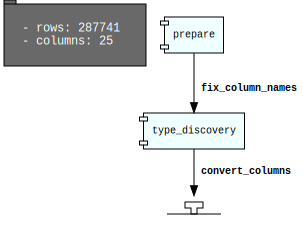

In [8]:
ds.visualize_transforms()

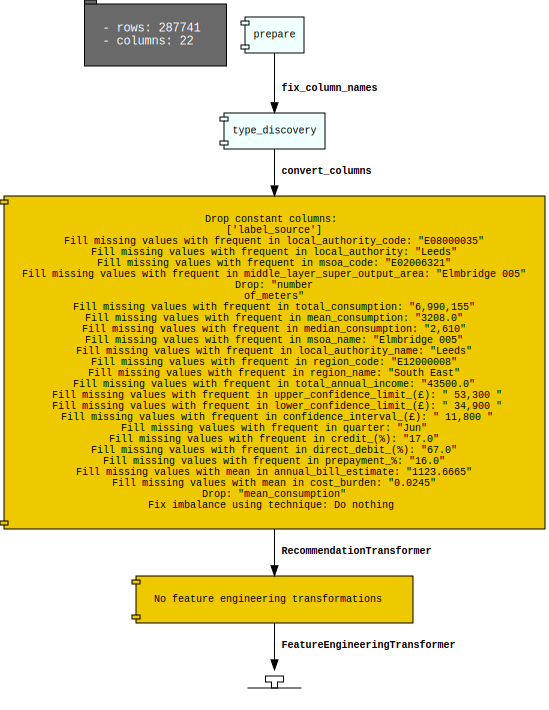

In [9]:
ds_transformed.visualize_transforms()

In [10]:
ds_transformed

default_risk_label,local_authority_code,local_authority,msoa_code,middle_layer_super_output_area,total_consumption,median_consumption,year,msoa_name,local_authority_name,region_code,region_name,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),quarter,credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden
0,E09000006,Bromley,E02000162,Bromley 036,"11,874,257","3,206",2018,Bromley 036,Bromley,E12000007,London,51000.000000,"60,500","42,900","17,600",Mar,31.000000,49.000000,21.000000,1188.600000,0.023306
0,E06000056,Central Bedfordshire,E02003649,Central Bedfordshire 031,"11,577,892","3,335",2017,Central Bedfordshire 031,Central Bedfordshire,E12000006,East,53700.000000,"63,700","45,300","18,400",Jun,17.000000,67.000000,16.000000,1189.500000,0.022151
0,W06000009,Pembrokeshire / Sir Benfro,W02000127,Pembrokeshire 002,"18,670,048","2,753",2018,Pembrokeshire 002,Pembrokeshire,W92000004,Wales,34400.000000,"40,800","29,000","11,800",Jun,17.000000,67.000000,16.000000,1099.800000,0.031971
0,E09000025,Newham,E02000735,Newham 022,"8,708,916","2,275",2022,Newham 022,Newham,E12000007,London,46100.000000,"54,500","38,900","15,600",Sep,25.000000,55.000000,19.000000,950.400000,0.020616
0,E08000005,Rochdale,E02001143,Rochdale 012,"13,184,462","2,585",2023,Rochdale 012,Rochdale,E12000002,North West,34900.000000,"41,200","29,600","11,600",Mar,17.000000,67.000000,16.000000,929.100000,0.026622


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 22 columns

In [11]:
from ads.dataset.factory import DatasetFactory


# Create ADS Dataset object
ads_ds = ds_transformed

# Set the target label (replace with your actual label column)
ads_ds = ads_ds.set_target("default_risk_label")

# Automatically transform the dataset (encoding, scaling, imputation)
ads_ds_transformed = ads_ds.auto_transform()

# Get pandas DataFrame ready for modeling
df_ready = ads_ds_transformed.to_pandas()

print("Transformed DataFrame shape:", df_ready.shape)
print(df_ready.head())

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

Transformed DataFrame shape: (287741, 22)
  local_authority_code local_authority  msoa_code  \
0            E06000001      Hartlepool  E02002483   
1            E06000001      Hartlepool  E02002483   
2            E06000001      Hartlepool  E02002483   
3            E06000001      Hartlepool  E02002483   
4            E06000001      Hartlepool  E02002484   

  middle_layer_super_output_area total_consumption median_consumption  year  \
0                 Hartlepool 001        12,986,912              3,100  2010   
1                 Hartlepool 001        12,986,912              3,100  2010   
2                 Hartlepool 001        12,986,912              3,100  2010   
3                 Hartlepool 001        12,986,912              3,100  2010   
4                 Hartlepool 002        15,109,783              2,735  2010   

        msoa_name local_authority_name region_code  ...  \
0  Hartlepool 001           Hartlepool   E12000001  ...   
1  Hartlepool 001           Hartlepool   E1200

In [12]:
from ads.dataset.label_encoder import DataFrameLabelEncoder

categorical_cols = [
    "local_authority_code", "local_authority", "msoa_code", "middle_layer_super_output_area",
    "msoa_name", "local_authority_name", "region_code", "region_name", "quarter"
]

df_encoded = DataFrameLabelEncoder().fit_transform(ds_transformed[categorical_cols].to_pandas())

In [13]:
df_encoded

,local_authority_code,local_authority,msoa_code,middle_layer_super_output_area,msoa_name,local_authority_name,region_code,region_name,quarter
0,0,154,2417,3647,2657,121,0,3,2
1,0,154,2417,3647,2657,121,0,3,1
2,0,154,2417,3647,2657,121,0,3,3
3,0,154,2417,3647,2657,121,0,3,0
4,0,154,2418,3648,2658,121,0,3,2
...,...,...,...,...,...,...,...,...,...
287736,367,200,8524,4952,3653,163,9,7,1
287737,367,200,8525,4953,3654,163,9,7,1
287738,367,200,8526,4954,3655,163,9,7,1
287739,367,200,8651,4955,3656,163,9,7,1


In [14]:
df_remaining = ds_transformed.drop(columns=categorical_cols)


In [15]:
df_final = pd.concat([df_remaining.reset_index(drop=True),
                      df_encoded.reset_index(drop=True)], axis=1)

In [16]:
df_final

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,local_authority,msoa_code,middle_layer_super_output_area,msoa_name,local_authority_name,region_code,region_name,quarter
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",31.000000,53.000000,16.000000,1041.000000,0.025896,0,154,2417,3647,2657,121,0,3,2
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",30.000000,54.000000,16.000000,1041.000000,0.025896,0,154,2417,3647,2657,121,0,3,1
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,55.000000,16.000000,1041.000000,0.025896,0,154,2417,3647,2657,121,0,3,3
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,56.000000,16.000000,1041.000000,0.025896,0,154,2417,3647,2657,121,0,3,0
0,"15,109,783","2,735",2010,29200.000000,"34,700","24,500","10,200",31.000000,53.000000,16.000000,944.100000,0.032332,0,154,2418,3648,2658,121,0,3,2


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 22 columns

In [17]:
# Columns we decided to drop
cols_to_drop = [
    "local_authority",          # drop if keeping local_authority_code
    "msoa_name",
    "middle_layer_super_output_area",
    "region_name"               # drop if keeping region_name
]

# Drop only if the columns exist in the DataFrame
df_final = df_final.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("✅ Columns dropped. Remaining columns are:")
print(df.columns.tolist())

✅ Columns dropped. Remaining columns are:
['local_authority_code', 'local_authority', 'msoa_code', 'middle_layer_super_output_area', 'number\nof_meters', 'total_consumption', 'mean_consumption', 'median_consumption', 'year', 'msoa_name', 'local_authority_name', 'region_code', 'region_name', 'total_annual_income', 'upper_confidence_limit_(£)', 'lower_confidence_limit_(£)', 'confidence_interval_(£)', 'quarter', 'credit_(%)', 'direct_debit_(%)', 'prepayment_%', 'annual_bill_estimate', 'cost_burden', 'default_risk_label', 'label_source']


In [18]:
df_final

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",31.000000,53.000000,16.000000,1041.000000,0.025896,0,2417,121,0,2
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",30.000000,54.000000,16.000000,1041.000000,0.025896,0,2417,121,0,1
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,55.000000,16.000000,1041.000000,0.025896,0,2417,121,0,3
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,56.000000,16.000000,1041.000000,0.025896,0,2417,121,0,0
0,"15,109,783","2,735",2010,29200.000000,"34,700","24,500","10,200",31.000000,53.000000,16.000000,944.100000,0.032332,0,2418,121,0,2


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 18 columns

In [19]:
ads_ds_final = df_final

In [20]:
ads_ds_final

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",31.000000,53.000000,16.000000,1041.000000,0.025896,0,2417,121,0,2
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",30.000000,54.000000,16.000000,1041.000000,0.025896,0,2417,121,0,1
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,55.000000,16.000000,1041.000000,0.025896,0,2417,121,0,3
0,"12,986,912","3,100",2010,40200.000000,"47,800","33,800","14,000",29.000000,56.000000,16.000000,1041.000000,0.025896,0,2417,121,0,0
0,"15,109,783","2,735",2010,29200.000000,"34,700","24,500","10,200",31.000000,53.000000,16.000000,944.100000,0.032332,0,2418,121,0,2


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 18 columns

In [21]:
df_final = ads_ds_final.to_pandas() 

In [22]:
df_final

,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,default_risk_label,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,"12,986,912","3,100",2010,40200.0,"47,800","33,800","14,000",31.0,53.0,16.0,1041.0,0.025896,0,0,2417,121,0,2
1,"12,986,912","3,100",2010,40200.0,"47,800","33,800","14,000",30.0,54.0,16.0,1041.0,0.025896,0,0,2417,121,0,1
2,"12,986,912","3,100",2010,40200.0,"47,800","33,800","14,000",29.0,55.0,16.0,1041.0,0.025896,0,0,2417,121,0,3
3,"12,986,912","3,100",2010,40200.0,"47,800","33,800","14,000",29.0,56.0,16.0,1041.0,0.025896,0,0,2417,121,0,0
4,"15,109,783","2,735",2010,29200.0,"34,700","24,500","10,200",31.0,53.0,16.0,944.1,0.032332,0,0,2418,121,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287736,"10,040,300","2,363",2023,38800.0,"46,000","32,700","13,300",17.0,67.0,16.0,821.1,0.021162,0,367,8524,163,9,1
287737,"10,291,416","2,224",2023,33500.0,"39,800","28,300","11,500",17.0,67.0,16.0,790.2,0.023588,0,367,8525,163,9,1
287738,"11,261,745","2,448",2023,37300.0,"44,300","31,400","12,900",17.0,67.0,16.0,874.2,0.023437,0,367,8526,163,9,1
287739,"12,099,972","2,679",2023,37100.0,"44,400","31,100","13,300",17.0,67.0,16.0,911.7,0.024574,0,367,8651,163,9,1


In [23]:
numerical_cols = [
    "total_consumption",
    "total_annual_income",
    "upper_confidence_limit_(£)",
    "lower_confidence_limit_(£)",
    "confidence_interval_(£)",
    "credit_(%)",
    "direct_debit_(%)",
    "prepayment_%",
    "annual_bill_estimate",
    "cost_burden"
]


for col in numerical_cols:
    df_final[col] = (df_final[col]
               .astype(str)
               .str.replace(',', '', regex=False)
               .str.replace('£', '', regex=False)
               .str.strip())
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

In [24]:
ads_ds_cleaned = DatasetFactory.from_dataframe(df_final)
ads_ds_cleaned = ads_ds_cleaned.set_target("default_risk_label")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
ads_ds_cleaned

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,11874257,"3,206",2018,51000.000000,60500,42900,17600,31.000000,49.000000,21.000000,1188.600000,0.023306,285,157,35,6,2
0,11577892,"3,335",2017,53700.000000,63700,45300,18400,17.000000,67.000000,16.000000,1189.500000,0.022151,52,3558,51,5,1
0,18670048,"2,753",2018,34400.000000,40800,29000,11800,17.000000,67.000000,16.000000,1099.800000,0.031971,353,8368,196,9,1
0,8708916,"2,275",2022,46100.000000,54500,38900,15600,25.000000,55.000000,19.000000,950.400000,0.020616,304,710,177,6,3
0,13184462,"2,585",2023,34900.000000,41200,29600,11600,17.000000,67.000000,16.000000,929.100000,0.026622,248,1105,212,1,2


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 18 columns

In [26]:
ads_ds_transformed = ads_ds_cleaned.auto_transform()
df_ready = ads_ds_transformed.to_pandas()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

In [27]:
df_ready

,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,default_risk_label,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,12986912,"3,100",2010,40200.0,47800,33800,14000,31.0,53.0,16.0,1041.0,0.025896,0,0,2417,121,0,2
1,12986912,"3,100",2010,40200.0,47800,33800,14000,30.0,54.0,16.0,1041.0,0.025896,0,0,2417,121,0,1
2,12986912,"3,100",2010,40200.0,47800,33800,14000,29.0,55.0,16.0,1041.0,0.025896,0,0,2417,121,0,3
3,12986912,"3,100",2010,40200.0,47800,33800,14000,29.0,56.0,16.0,1041.0,0.025896,0,0,2417,121,0,0
4,15109783,"2,735",2010,29200.0,34700,24500,10200,31.0,53.0,16.0,944.1,0.032332,0,0,2418,121,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287736,10040300,"2,363",2023,38800.0,46000,32700,13300,17.0,67.0,16.0,821.1,0.021162,0,367,8524,163,9,1
287737,10291416,"2,224",2023,33500.0,39800,28300,11500,17.0,67.0,16.0,790.2,0.023588,0,367,8525,163,9,1
287738,11261745,"2,448",2023,37300.0,44300,31400,12900,17.0,67.0,16.0,874.2,0.023437,0,367,8526,163,9,1
287739,12099972,"2,679",2023,37100.0,44400,31100,13300,17.0,67.0,16.0,911.7,0.024574,0,367,8651,163,9,1


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_ready[numerical_cols] = scaler.fit_transform(df_ready[numerical_cols])

In [29]:
df_ready

,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,default_risk_label,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,0.101115,"3,100",2010,-0.611619,-0.616642,-0.597107,-0.418307,1.070616,-0.945905,0.198488,-0.379671,0.232144,0,0,2417,121,0,2
1,0.101115,"3,100",2010,-0.611619,-0.616642,-0.597107,-0.418307,0.931274,-0.832712,0.198488,-0.379671,0.232144,0,0,2417,121,0,1
2,0.101115,"3,100",2010,-0.611619,-0.616642,-0.597107,-0.418307,0.791932,-0.719520,0.198488,-0.379671,0.232144,0,0,2417,121,0,3
3,0.101115,"3,100",2010,-0.611619,-0.616642,-0.597107,-0.418307,0.791932,-0.606327,0.198488,-0.379671,0.232144,0,0,2417,121,0,0
4,0.633151,"2,735",2010,-1.576595,-1.583071,-1.561501,-1.294475,1.070616,-0.945905,0.198488,-0.802516,1.408704,0,0,2418,121,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287736,-0.637369,"2,363",2023,-0.734434,-0.749434,-0.711175,-0.579706,-0.880172,0.638790,0.198488,-1.339254,-0.633029,0,367,8524,163,9,1
287737,-0.574434,"2,224",2023,-1.199377,-1.206828,-1.167447,-0.994733,-0.880172,0.638790,0.198488,-1.474093,-0.189637,0,367,8525,163,9,1
287738,-0.331249,"2,448",2023,-0.866022,-0.874848,-0.845983,-0.671934,-0.880172,0.638790,0.198488,-1.107540,-0.217250,0,367,8526,163,9,1
287739,-0.121171,"2,679",2023,-0.883567,-0.867471,-0.877092,-0.579706,-0.880172,0.638790,0.198488,-0.943900,-0.009394,0,367,8651,163,9,1


In [30]:
ads_ds_cleaned = DatasetFactory.from_dataframe(df_ready)
ads_ds_cleaned = ads_ds_cleaned.set_target("default_risk_label")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
ads_ds_cleaned

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,msoa_code,local_authority_name,region_code,quarter
0,-0.177740,"3,206",2018,0.335812,0.320279,0.346547,0.411747,1.070616,-1.398674,1.689714,0.264415,-0.241216,285,157,35,6,2
0,-0.252015,"3,335",2017,0.572670,0.556353,0.595423,0.596204,-0.880172,0.638790,0.198488,0.268343,-0.452347,52,3558,51,5,1
0,1.525429,"2,753",2018,-1.120425,-1.133055,-1.094859,-0.925562,-0.880172,0.638790,0.198488,-0.123083,1.342669,353,8368,196,9,1
0,-0.971041,"2,275",2022,-0.094041,-0.122361,-0.068246,-0.049394,0.234564,-0.719520,1.093223,-0.775024,-0.732891,304,710,177,6,3
0,0.150625,"2,585",2023,-1.076562,-1.103545,-1.032640,-0.971676,-0.880172,0.638790,0.198488,-0.867972,0.364896,248,1105,212,1,2


BinaryClassificationDataset(target: default_risk_label) 287,741 rows, 18 columns

In [33]:
from ads.dataset.helper import up_sample
ds_upsampled = up_sample(ads_ds_cleaned, ['default_risk_label'], sampler = 'default', feature_types= None)
ds_upsampled.head

<bound method NDFrame.head of         total_consumption median_consumption  year  total_annual_income  \
0                0.101115              3,100  2010            -0.611619   
1                0.101115              3,100  2010            -0.611619   
2                0.101115              3,100  2010            -0.611619   
3                0.101115              3,100  2010            -0.611619   
4                0.633151              2,735  2010            -1.576595   
...                   ...                ...   ...                  ...   
573711           1.299794              4,506  2015             0.958661   
573712           1.598095              4,090  2017             0.177907   
573713          -0.422456              2,707  2017            -1.673093   
573714           1.022536              2,455  2018            -1.418690   
573715          -1.201018              2,609  2018            -1.559050   

        upper_confidence_limit_(£)  lower_confidence_limit_(£)  \
0  

In [35]:
ds_upsampled[""].value_counts() 


0    286858
1    286858
Name: count, dtype: int64

In [39]:
ds_upsampled = ds_upsampled.rename(columns={"": "default_risk_label"})

In [40]:
ads_ds_balanced = DatasetFactory.from_dataframe(ds_upsampled).set_target('default_risk_label')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
ads_ds_balanced

default_risk_label,total_consumption,median_consumption,year,total_annual_income,upper_confidence_limit_(£),lower_confidence_limit_(£),confidence_interval_(£),credit_(%),direct_debit_(%),prepayment_%,annual_bill_estimate,cost_burden,local_authority_code,msoa_code,local_authority_name,region_code,quarter
1,0.080183,"2,953",2017,-1.374828,-1.398638,-1.343734,-1.202247,-0.183462,-0.379942,1.391469,-0.121774,1.882426,8,2571,20,1,0
1,-0.327727,"2,697",2018,-1.059017,-1.066659,-1.043009,-0.833334,-0.322804,-0.040365,0.794978,-0.036682,1.329234,276,2243,143,2,0
1,0.409828,"4,053",2017,-0.164221,-0.159248,-0.151204,0.019777,-0.183462,-0.379942,1.391469,1.756810,1.674825,246,6771,158,1,0
0,-0.301514,"3,463",2015,-0.436169,-0.454341,-0.410450,-0.326078,0.513248,-0.606327,0.198488,0.558967,0.939520,12,2675,184,2,3
1,0.232036,"3,550",2014,-0.251946,-0.210889,-0.286012,0.158120,1.906668,-2.191022,1.689714,1.595788,1.661985,291,331,111,6,0


BinaryClassificationDataset(target: default_risk_label) 573,716 rows, 18 columns